In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df=pd.read_csv("supermarket_sales - Sheet1 (1).csv")

In [3]:
#display basic info
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
#check for missing value  
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [18]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
df.shape

(1000, 17)

In [11]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

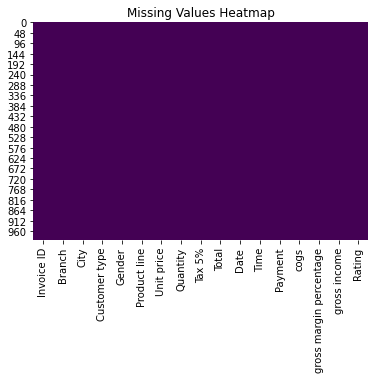

In [19]:
# visualizing missing values 
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


<Figure size 720x432 with 0 Axes>

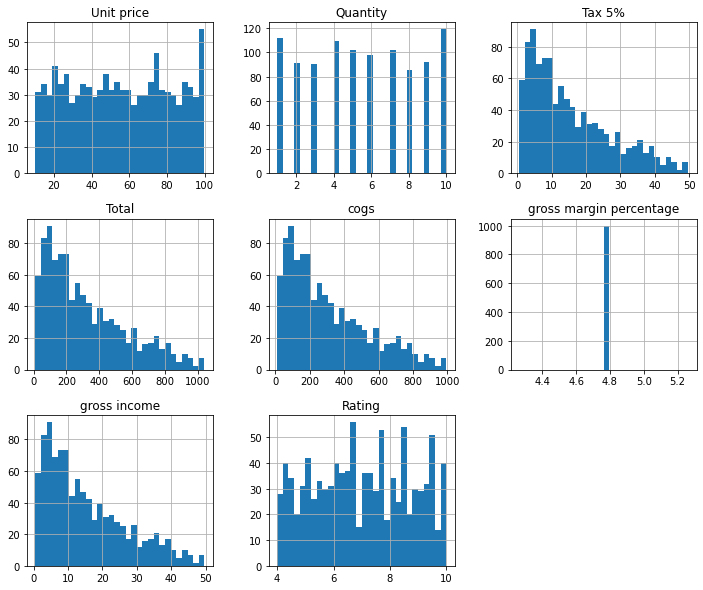

In [20]:
#
plt.figure(figsize=(10,6))
df.hist(figsize=(12,10), bins=30)
plt.show()

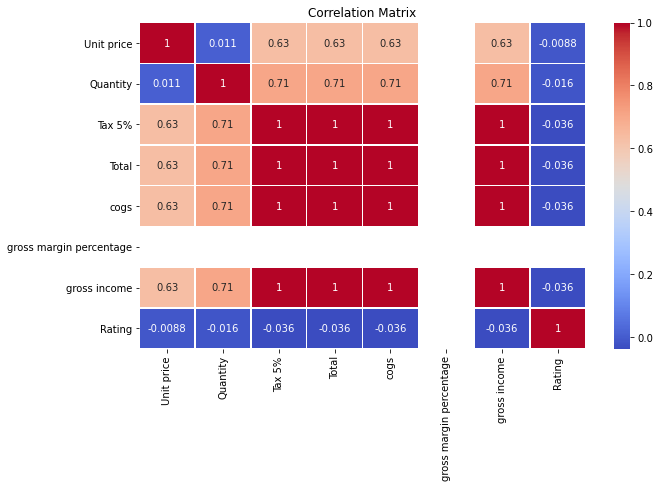

In [21]:
 #Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

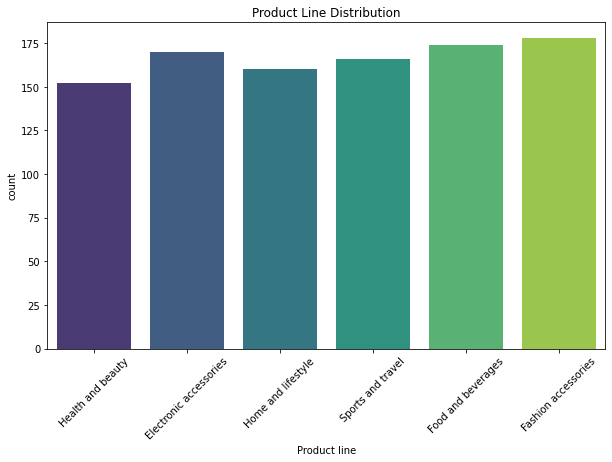

In [22]:
# Categorical variable analysis
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Product line', palette='viridis')
plt.xticks(rotation=45)
plt.title("Product Line Distribution")
plt.show()

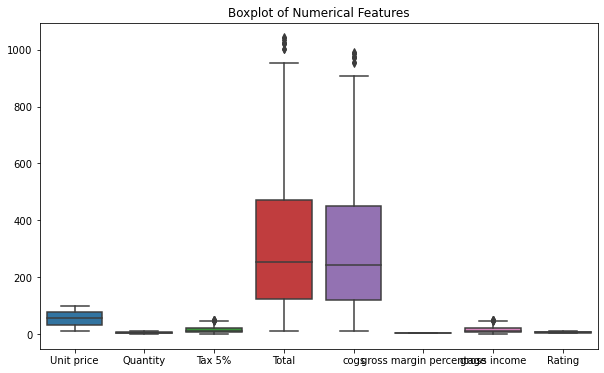

In [23]:
# Boxplot for numerical variables
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot of Numerical Features")
plt.show()


In [9]:
# Checking outliers using IQR
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

display(detect_outliers(df.select_dtypes(include=['number'])))

Unit price                 0
Quantity                   0
Tax 5%                     9
Total                      9
cogs                       9
gross margin percentage    0
gross income               9
Rating                     0
dtype: int64

In [10]:
#Which product line generates the highest revenue
df.groupby("Product line")["Total"].sum().sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

In [11]:
#What is the most common payment method
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [12]:
#What is the average rating given by customers
df["Rating"].mean()

6.972700000000003

In [6]:
# Conclusion
print("Data Analysis Completed!")

Data Analysis Completed!


In [13]:
#How does the sales trend vary by time of the day (morning, afternoon, evening)?
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour
df["Time_of_Day"] = pd.cut(df["Hour"], bins=[0, 12, 17, 24], labels=["Morning", "Afternoon", "Evening"], right=False)
df.groupby("Time_of_Day")["Total"].sum()

Time_of_Day
Morning       61798.8105
Afternoon    148023.3405
Evening      113144.5980
Name: Total, dtype: float64

In [14]:
#Which gender spends more on average
df.groupby("Gender")["Total"].mean()

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

In [15]:
#What is the total revenue for each branch?
df.groupby("Branch")["Total"].sum()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [16]:
# Which customer type contributes more to the total sales?
df.groupby("Customer type")["Total"].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [17]:
#What is the highest quantity of products purchased in a single transaction?
df["Quantity"].max()

10

In [18]:
#what are the top 5 most sold products based on quantity?
df.groupby("Product line")["Quantity"].sum().sort_values(ascending=False).head(5)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Name: Quantity, dtype: int64

In [20]:
import pyodbc


In [22]:
conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-75VEL8U\\SQLEXPRESS;"
    "Database=Project;"
    "Trusted_connection=yes;"
)

cursor = conn.cursor()

cursor.execute("Select * from supermarket_sales_data29")
rows = cursor.fetchall()

print(rows)


[('750-67-8428', 'A', 'Yangon', 'Member', 'Female', 'Health and beauty', 74.69000244140625, 7, 26.14150047302246, 548.9714965820312, datetime.date(2019, 1, 5), datetime.time(13, 8), 'Ewallet', 522.8300170898438, 4.761904716491699, 26.14150047302246, 9.100000381469727), ('226-31-3081', 'C', 'Naypyitaw', 'Normal', 'Female', 'Electronic accessories', 15.279999732971191, 5, 3.819999933242798, 80.22000122070312, datetime.date(2019, 3, 8), datetime.time(10, 29), 'Cash', 76.4000015258789, 4.761904716491699, 3.819999933242798, 9.600000381469727), ('631-41-3108', 'A', 'Yangon', 'Normal', 'Male', 'Home and lifestyle', 46.33000183105469, 7, 16.215499877929688, 340.5255126953125, datetime.date(2019, 3, 3), datetime.time(13, 23), 'Credit card', 324.30999755859375, 4.761904716491699, 16.215499877929688, 7.400000095367432), ('123-19-1176', 'A', 'Yangon', 'Member', 'Male', 'Health and beauty', 58.220001220703125, 8, 23.288000106811523, 489.0480041503906, datetime.date(2019, 1, 27), datetime.time(20, 3

In [23]:
import os
print(os.getcwd()) 

C:\Users\Lenovo\SuperMarket_Analysis
